In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [ ]:
train = shuffle(pd.read_csv("/content/TRAIN.csv"))
test = shuffle(pd.read_csv("/content/TEST.csv"))

In [ ]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [ ]:
train_outcome = pd.crosstab(index=train["GRAD"],  # Make a crosstab
                              columns="area")      # Name the count column

train_outcome

col_0,area
GRAD,
A,200
B,200
C,201
D,201


In [ ]:
X_train = pd.DataFrame(train.drop(['GRAD','feactal dimension'],axis=1))
Y_train_label = train.GRAD.values.astype(object)
X_test = pd.DataFrame(test.drop(['GRAD','feactal dimension'],axis=1))
Y_test_label = test.GRAD.values.astype(object)

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))
names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (802, 10)
Dimension of Test set (200, 10) 

Number of numeric features: 10


In [ ]:
params_grid = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4,5,6], 'C': [1, 10, 100, 1000]},
    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]}
]


In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=10)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}])

In [ ]:
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.6745833333333333 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 



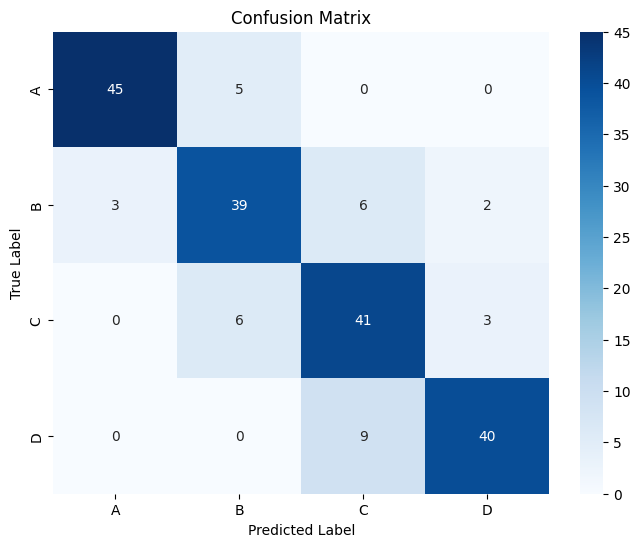

Average Precision: 0.8346329365079365
Average Recall: 0.8290816326530612
Average F1-score: 0.8307540205965968

Accuracy: 0.8291457286432161


In [ ]:

print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Testing set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
#print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Perform GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Use a more complex base estimator
base_estimator = RandomForestClassifier()

# Parameter grid for AdaBoost
params_grid_adaboost = {
    'base_estimator': [base_estimator],
    'n_estimators': [100, 200, 300,500,1000,10000],
    'learning_rate': [0.0001,.001,0.01, 0.1, 1.0]
}

adaboost_model = AdaBoostClassifier()
adaboost_grid = GridSearchCV(adaboost_model, params_grid_adaboost, cv=10)
adaboost_grid.fit(X_train_scaled, Y_train)

# Get the best estimator and its parameters
best_adaboost_model = adaboost_grid.best_estimator_
best_params = adaboost_grid.best_params_
best_score = adaboost_grid.best_score_

# Print the results
print('Best score for training data:', best_score, "\n")
print('Best parameters:')
print('  - n_estimators:', best_params['n_estimators'])
print('  - learning_rate:', best_params['learning_rate'])

# Use the best model for prediction
Y_pred = best_adaboost_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best score for training data: 0.6595216049382716 

Best parameters:
  - n_estimators: 10000
  - learning_rate: 1.0


In [ ]:

print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Testing set score for adaboost: %f" % best_adaboost_model.score(X_test_scaled , Y_test))

adaboost_model.score



              precision    recall  f1-score   support

           A       0.74      0.90      0.81        50
           B       0.61      0.40      0.48        50
           C       0.51      0.51      0.51        51
           D       0.73      0.82      0.77        49

    accuracy                           0.66       200
   macro avg       0.65      0.66      0.64       200
weighted avg       0.64      0.66      0.64       200

Testing set score for adaboost: 0.655000


<bound method ClassifierMixin.score of AdaBoostClassifier()>

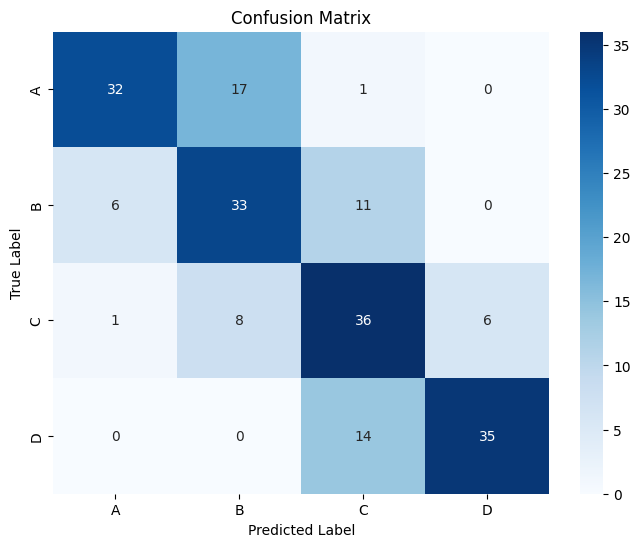

Average Precision: 0.705945508907472
Average Recall: 0.6800420168067227
Average F1-score: 0.6862895385193287

Accuracy: 0.68


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace the values with your actual confusion matrix
conf_matrix = np.array([[32, 17, 1, 0],
                       [6, 33, 11, 0],
                       [1, 8, 36, 6],
                       [0, 0, 14, 35]])

# Define class labels
class_labels = ['A', 'B', 'C', 'D']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
precision = conf_matrix.diagonal() / np.sum(conf_matrix, axis=0)
precision_avg = np.mean(precision)

# Recall
recall = conf_matrix.diagonal() / np.sum(conf_matrix, axis=1)
recall_avg = np.mean(recall)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score_avg = np.mean(f1_score)

# Accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)


print("Average Precision:", precision_avg)

print("Average Recall:", recall_avg)

print("Average F1-score:", f1_score_avg)
print("\nAccuracy:", accuracy)



In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

base_estimator = LogisticRegression(solver='liblinear', random_state=42)

# Parameter grid for AdaBoost with Logistic Regression
params_grid_adaboost_logistic = {
    'base_estimator': [base_estimator],
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

adaboost_model_logistic = AdaBoostClassifier()
adaboost_grid_logistic = GridSearchCV(adaboost_model_logistic, params_grid_adaboost_logistic, cv=10)
adaboost_grid_logistic.fit(X_train_scaled, Y_train)

# Get the best estimator and its parameters
best_adaboost_model_logistic = adaboost_grid_logistic.best_estimator_
best_params_logistic = adaboost_grid_logistic.best_params_
best_score_logistic = adaboost_grid_logistic.best_score_

# Print the results
print('Best score for training data (Logistic Regression):', best_score_logistic, "\n")
print('Best parameters (Logistic Regression):')
print('  - n_estimators:', best_params_logistic['n_estimators'])
print('  - learning_rate:', best_params_logistic['learning_rate'])

# Use the best model for prediction
Y_pred_logistic = best_adaboost_model_logistic.predict(X_test_scaled)
Y_pred_label_logistic = list(encoder.inverse_transform(Y_pred_logistic))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best score for training data (Logistic Regression): 0.6595833333333334 

Best parameters (Logistic Regression):
  - n_estimators: 200
  - learning_rate: 0.1


In [ ]:
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Testing set score for adaboost: %f" % best_adaboost_model_logistic.score(X_test_scaled , Y_test))

adaboost_model.score

[[45  5  0  0]
 [12 23 14  1]
 [ 2  8 27 14]
 [ 0  0  8 41]]


              precision    recall  f1-score   support

           A       0.76      0.90      0.83        50
           B       0.64      0.46      0.53        50
           C       0.55      0.53      0.54        51
           D       0.73      0.84      0.78        49

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.67      0.68      0.67       200

Testing set score for adaboost: 0.665000


<bound method ClassifierMixin.score of AdaBoostClassifier()>

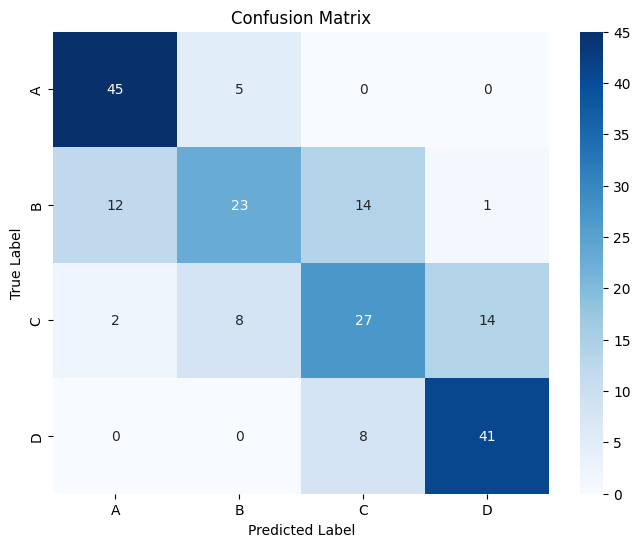

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace the values with your actual confusion matrix
conf_matrix = [[45, 5, 0, 0],
               [12, 23, 14, 1],
               [2, 8, 27, 14],
               [0, 0, 8, 41]]

# Define class labels
class_labels = ['A', 'B', 'C', 'D']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for KNeighborsClassifier
params_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}


knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, params_grid_knn, cv=2)
knn_grid.fit(X_train_scaled, Y_train)

# Get the best estimator and its parameters
best_knn_model = knn_grid.best_estimator_
best_params_knn = knn_grid.best_params_
best_score_knn = knn_grid.best_score_

# Print the results
print('Best score for training data:', best_score_knn, "\n")
print('Best parameters:')
print('  - n_neighbors:', best_params_knn['n_neighbors'])
print('  - weights:', best_params_knn['weights'])
print('  - p:', best_params_knn['p'])

# Use the best model for prediction
Y_pred_knn = best_knn_model.predict(X_test_scaled)
Y_pred_label_knn = list(encoder.inverse_transform(Y_pred_knn))


Best score for training data: 0.6359102244389028 

Best parameters:
  - n_neighbors: 9
  - weights: uniform
  - p: 1


In [ ]:
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Testing set score for adaboost: %f" % best_knn_model.score(X_test_scaled , Y_test))

adaboost_model.score

[[45  5  0  0]
 [12 21 17  0]
 [ 3  7 26 15]
 [ 0  0  9 40]]


              precision    recall  f1-score   support

           A       0.75      0.90      0.82        50
           B       0.64      0.42      0.51        50
           C       0.50      0.51      0.50        51
           D       0.73      0.82      0.77        49

    accuracy                           0.66       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.65      0.66      0.65       200

Testing set score for adaboost: 0.655000


<bound method ClassifierMixin.score of AdaBoostClassifier()>